In [1]:
import pandas as pd

merged_data_rick_and_morty = pd.read_excel("13.Rick and Morty API Data.xlsx", sheet_name="MergedData")


In [2]:
merged_data_rick_and_morty

,character_id,character_name,status,species,type,gender,episode_count,origin_id,origin_type,origin_dimension,location_id,location_type,location_dimension
0,1,Rick Sanchez,Alive,Human,NaN,Male,51,1.0,Planet,Dimension C-137,3.0,Space station,unknown
1,2,Morty Smith,Alive,Human,NaN,Male,51,NaN,NaN,NaN,3.0,Space station,unknown
2,3,Summer Smith,Alive,Human,NaN,Female,42,20.0,Planet,Replacement Dimension,20.0,Planet,Replacement Dimension
3,4,Beth Smith,Alive,Human,NaN,Female,42,20.0,Planet,Replacement Dimension,20.0,Planet,Replacement Dimension
4,5,Jerry Smith,Alive,Human,NaN,Male,39,20.0,Planet,Replacement Dimension,20.0,Planet,Replacement Dimension
...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,822,Young Jerry,unknown,Human,NaN,Male,1,30.0,Planet,unknown,30.0,Planet,unknown
822,823,Young Beth,unknown,Human,NaN,Female,1,30.0,Planet,unknown,30.0,Planet,unknown
823,824,Young Beth,unknown,Human,NaN,Female,1,30.0,Planet,unknown,30.0,Planet,unknown
824,825,Young Jerry,unknown,Human,NaN,Male,1,30.0,Planet,unknown,30.0,Planet,unknown


In [3]:
#Looking at each of the workbooks in my spreadsheet
xls = pd.ExcelFile("13.Rick and Morty API Data.xlsx")
print(xls.sheet_names)


['Characters', 'Episodes', 'Locations', 'MergedData']


In [4]:
import os

#Checking what Excel Files exist in the Direcorty this Code file is saved in
files = [f for f in os.listdir() if f.endswith((".xlsx", ".xls"))]
print(files)


['13.Rick and Morty API Data.xlsx']


In [5]:
import os

#Looking at all file names and their extensions in the directory this code file in saved in
files = os.listdir()
for f in files:
    print(f)


1.Create Python API.ipynb
10.Learning About APIs.ipynb
11.Learning About APIs PART 2.ipynb
12.API Play in Python.ipynb
13.Rick and Morty API Data.xlsx
13.Rick and Morty Data from API.ipynb
14.Counting Episodes per Character.ipynb
15.Playing with Duplicates Rick and Morty Data.ipynb
16.Playing with Rick and Morty Data Extended.ipynb
17.Playing with Rick and Morty Data Extended2.ipynb
18.Playing with Rick and Morty Data Extended3.ipynb
2.Get Pokemon API Data.ipynb
3.Get Pokemon API Data PART 2.ipynb
4.Pokemon Quiz Generator with Data from API.ipynb
5.Create Python API Rick and Morty.ipynb
6.Create Python API Request.ipynb
7.Post Requests in Python.ipynb
8.Post Requests API in Python.ipynb
9.Get and Post API Requests in Python.ipynb


In [6]:
# Count all missing values in the entire DataFrame
# df.isnull() creates a True/False mask for each cell
# .sum() on that mask counts True values per column
# another .sum() adds all column counts together
total_nulls = merged_data_rick_and_morty.isnull().sum().sum()
print(total_nulls)


1384


In [7]:
# Count missing values for each column individually
# This helps you see which columns need cleaning
nulls_per_column = merged_data_rick_and_morty.isnull().sum()
print(nulls_per_column)


character_id            0
character_name          0
status                  0
species                 0
type                  401
gender                  0
episode_count           0
origin_id             300
origin_type           302
origin_dimension      303
location_id            21
location_type          23
location_dimension     34
dtype: int64


In [8]:
# Loop through each column and print the missing value percentage
for col in merged_data_rick_and_morty.columns:
    # Calculate percentage of missing values for this column
    missing_pct = merged_data_rick_and_morty[col].isnull().mean() * 100
    
    # Print in the format you requested
    print(f"{col}: Missing values percentage = {missing_pct:.2f}%")


character_id: Missing values percentage = 0.00%
character_name: Missing values percentage = 0.00%
status: Missing values percentage = 0.00%
species: Missing values percentage = 0.00%
type: Missing values percentage = 48.55%
gender: Missing values percentage = 0.00%
episode_count: Missing values percentage = 0.00%
origin_id: Missing values percentage = 36.32%
origin_type: Missing values percentage = 36.56%
origin_dimension: Missing values percentage = 36.68%
location_id: Missing values percentage = 2.54%
location_type: Missing values percentage = 2.78%
location_dimension: Missing values percentage = 4.12%


In [9]:
# Count missing values for each row
# axis=1 means "operate across columns"
nulls_per_row = merged_data_rick_and_morty.isnull().sum(axis=1)
print(nulls_per_row)


0      1
1      4
2      1
3      1
4      1
      ..
821    1
822    1
823    1
824    1
825    0
Length: 826, dtype: int64


In [10]:
# Build a clean summary DataFrame showing:
# - how many nulls each column has
# - what percentage of the column is missing
null_summary = pd.DataFrame({
    "null_count": merged_data_rick_and_morty.isnull().sum(),
    "null_percent": merged_data_rick_and_morty.isnull().mean() * 100
})

print(null_summary)


                    null_count  null_percent
character_id                 0      0.000000
character_name               0      0.000000
status                       0      0.000000
species                      0      0.000000
type                       401     48.547215
gender                       0      0.000000
episode_count                0      0.000000
origin_id                  300     36.319613
origin_type                302     36.561743
origin_dimension           303     36.682809
location_id                 21      2.542373
location_type               23      2.784504
location_dimension          34      4.116223


In [11]:
# Count total number of null values in the entire DataFrame
total_nulls = merged_data_rick_and_morty.isnull().sum().sum()

# Count nulls per column
nulls_per_column = merged_data_rick_and_morty.isnull().sum()

# Calculate what percentage of ALL nulls come from each column
# (column_nulls / total_nulls) * 100
null_percentage_of_total = (nulls_per_column / total_nulls) * 100

# Print results in a readable format
for col, pct in null_percentage_of_total.items():
    print(f"{col}: contributes {pct:.2f}% of all missing values in the dataset")


character_id: contributes 0.00% of all missing values in the dataset
character_name: contributes 0.00% of all missing values in the dataset
status: contributes 0.00% of all missing values in the dataset
species: contributes 0.00% of all missing values in the dataset
type: contributes 28.97% of all missing values in the dataset
gender: contributes 0.00% of all missing values in the dataset
episode_count: contributes 0.00% of all missing values in the dataset
origin_id: contributes 21.68% of all missing values in the dataset
origin_type: contributes 21.82% of all missing values in the dataset
origin_dimension: contributes 21.89% of all missing values in the dataset
location_id: contributes 1.52% of all missing values in the dataset
location_type: contributes 1.66% of all missing values in the dataset
location_dimension: contributes 2.46% of all missing values in the dataset


In [12]:
#For datasets that might contain no null values
total_nulls = merged_data_rick_and_morty.isnull().sum().sum()

if total_nulls == 0:
    print("No missing values in the dataset.")
else:
    nulls_per_column = merged_data_rick_and_morty.isnull().sum()
    null_percentage_of_total = (nulls_per_column / total_nulls) * 100

    for col, pct in null_percentage_of_total.items():
        print(f"{col}: contributes {pct:.2f}% of all missing values in the dataset")


character_id: contributes 0.00% of all missing values in the dataset
character_name: contributes 0.00% of all missing values in the dataset
status: contributes 0.00% of all missing values in the dataset
species: contributes 0.00% of all missing values in the dataset
type: contributes 28.97% of all missing values in the dataset
gender: contributes 0.00% of all missing values in the dataset
episode_count: contributes 0.00% of all missing values in the dataset
origin_id: contributes 21.68% of all missing values in the dataset
origin_type: contributes 21.82% of all missing values in the dataset
origin_dimension: contributes 21.89% of all missing values in the dataset
location_id: contributes 1.52% of all missing values in the dataset
location_type: contributes 1.66% of all missing values in the dataset
location_dimension: contributes 2.46% of all missing values in the dataset


In [13]:

# ---------------------------------------------------------
# 1. Extract the character names column
#    (Assuming the column is called "name" in your dataset)
# ---------------------------------------------------------
character_names = merged_data_rick_and_morty["character_name"].tolist()

# ---------------------------------------------------------
# 2. Display all character names
# ---------------------------------------------------------
print("List of all character names:")
for name in character_names:
    print(name)

# ---------------------------------------------------------
# 3. Count how many characters there are
# ---------------------------------------------------------
total_characters = len(character_names)
print(f"\nTotal number of characters: {total_characters}")


List of all character names:
Rick Sanchez
Morty Smith
Summer Smith
Beth Smith
Jerry Smith
Abadango Cluster Princess
Abradolf Lincler
Adjudicator Rick
Agency Director
Alan Rails
Albert Einstein
Alexander
Alien Googah
Alien Morty
Alien Rick
Amish Cyborg
Annie
Antenna Morty
Antenna Rick
Ants in my Eyes Johnson
Aqua Morty
Aqua Rick
Arcade Alien
Armagheadon
Armothy
Arthricia
Artist Morty
Attila Starwar
Baby Legs
Baby Poopybutthole
Baby Wizard
Bearded Lady
Beebo
Benjamin
Bepisian
Beta-Seven
Beth Sanchez
Beth Smith
Beth Smith
Beth's Mytholog
Big Boobed Waitress
Big Head Morty
Big Morty
Body Guard Morty
Bill
Bill
Birdperson
Black Rick
Blamph
Blim Blam
Blue Diplomat
Blue Footprint Guy
Blue Shirt Morty
Bobby Moynihan
Boobloosian
Bootleg Portal Chemist Rick
Borpocian
Brad
Brad Anderson
Calypso
Campaign Manager Morty
Canklanker Thom
Centaur
Chris
Chris
Coach Feratu (Balik Alistane)
Collector
Colossus
Commander Rick
Concerto
Conroy
Cool Rick
Cop Morty
Cop Rick
Courier Flap
Cousin Nicky
Cowboy Morty

✅ False
The row is NOT a duplicate — this is the first time pandas has seen this exact combination of values.

✅ True
The row IS a duplicate — pandas has seen an identical row earlier in the DataFrame.

In [14]:
#Turn character_name into something that the pandas dataframe can work with
character_names1 = pd.DataFrame(character_names)
#Store 
duplicates = character_names1.duplicated()

print(duplicates)



0      False
1      False
2      False
3      False
4      False
       ...  
821    False
822    False
823     True
824     True
825    False
Length: 826, dtype: bool


In [15]:
# Get count of duplicates in a single column using dataframe.pivot_table()
df2 = merged_data_rick_and_morty.pivot_table(index = ['character_name'], aggfunc ='size')
print("Get count of duplicate values in a single column:\n", df2)

Get count of duplicate values in a single column:
 character_name
26 Years Old Morty           1
40 Years Old Morty           1
7+7 Years Old Morty          1
80's snake                   1
Abadango Cluster Princess    1
                            ..
Zarbadar Gloonch             1
Zarbadar's Mytholog          1
Zeep Xanflorp                1
Zeta Alpha Rick              1
Zick Zack                    1
Length: 757, dtype: int64


In [16]:
character_names2 = pd.DataFrame(character_names)
character_names2 = character_names2.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

In [17]:
character_names2

,0
0,Rick Sanchez
1,Morty Smith
2,Summer Smith
3,Beth Smith
4,Jerry Smith
...,...
819,Redhead Morty
820,Gotron
821,Young Jerry
822,Young Beth


In [18]:
character_names1

,0
0,Rick Sanchez
1,Morty Smith
2,Summer Smith
3,Beth Smith
4,Jerry Smith
...,...
821,Young Jerry
822,Young Beth
823,Young Beth
824,Young Jerry


In [19]:
# Count how many rows are duplicates of a previous row
duplicate_row_count_after_duplicates_removal = character_names2.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_row_count_after_duplicates_removal}")


Number of duplicate rows: 0


In [20]:
# Count how many rows are duplicates of a previous row
duplicate_row_count_before_duplicates_removal = character_names1.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_row_count_before_duplicates_removal}")


Number of duplicate rows: 69


In [21]:
# Count how many duplicate values each column contains
duplicate_counts = merged_data_rick_and_morty.apply(lambda col: col.duplicated().sum())

print("Duplicate counts per column:")
print(duplicate_counts)


Duplicate counts per column:
character_id            0
character_name         69
status                823
species               816
type                  656
gender                822
episode_count         813
origin_id             729
origin_type           796
origin_dimension      793
location_id           731
location_type         787
location_dimension    805
dtype: int64


In [22]:
# Count how many unique values each column contains
unique_counts = merged_data_rick_and_morty.nunique()

print("Unique value counts per column:")
print(unique_counts)


Unique value counts per column:
character_id          826
character_name        757
status                  3
species                10
type                  169
gender                  4
episode_count          13
origin_id              96
origin_type            29
origin_dimension       32
location_id            94
location_type          38
location_dimension     20
dtype: int64


In [23]:
# Count how many entries each column has BEFORE removing duplicates
before_counts = merged_data_rick_and_morty.count()

print("Entries per column BEFORE removing duplicates:")
print(before_counts)


Entries per column BEFORE removing duplicates:
character_id          826
character_name        826
status                826
species               826
type                  425
gender                826
episode_count         826
origin_id             526
origin_type           524
origin_dimension      523
location_id           805
location_type         803
location_dimension    792
dtype: int64


In [24]:
# Remove duplicate rows based on ALL columns
merged_data_rick_and_morty_no_duplicates = merged_data_rick_and_morty.drop_duplicates()


In [25]:
# Count how many entries each column has AFTER removing duplicates
after_counts = merged_data_rick_and_morty_no_duplicates.count()

print("\nEntries per column AFTER removing duplicates:")
print(after_counts)



Entries per column AFTER removing duplicates:
character_id          826
character_name        826
status                826
species               826
type                  425
gender                826
episode_count         826
origin_id             526
origin_type           524
origin_dimension      523
location_id           805
location_type         803
location_dimension    792
dtype: int64


In [26]:
# Count how many null (missing) values each column contains
null_counts = merged_data_rick_and_morty.isnull().sum()

print("Null entries per column:")
print(null_counts)


Null entries per column:
character_id            0
character_name          0
status                  0
species                 0
type                  401
gender                  0
episode_count           0
origin_id             300
origin_type           302
origin_dimension      303
location_id            21
location_type          23
location_dimension     34
dtype: int64


In [27]:
null_percentages = merged_data_rick_and_morty.isnull().mean() * 100
print(null_percentages)


character_id           0.000000
character_name         0.000000
status                 0.000000
species                0.000000
type                  48.547215
gender                 0.000000
episode_count          0.000000
origin_id             36.319613
origin_type           36.561743
origin_dimension      36.682809
location_id            2.542373
location_type          2.784504
location_dimension     4.116223
dtype: float64


In [28]:
import pandas as pd

df = merged_data_rick_and_morty  # your dataset

# ---------------------------------------------------------
# 1. Count duplicates per column
#    .duplicated() marks True for every value that has appeared before
# ---------------------------------------------------------
duplicates_per_column = df.apply(lambda col: col.duplicated().sum())

# ---------------------------------------------------------
# 2. Count total duplicates across the entire dataset
# ---------------------------------------------------------
total_duplicates = duplicates_per_column.sum()

# ---------------------------------------------------------
# 3. Calculate what percentage of ALL duplicates
#    each column contributes
# ---------------------------------------------------------
duplicate_percentage = (duplicates_per_column / total_duplicates) * 100

# ---------------------------------------------------------
# 4. Display results
# ---------------------------------------------------------
print("Percentage of all duplicates contributed by each column:")
print(duplicate_percentage.round(2))


Percentage of all duplicates contributed by each column:
character_id          0.00
character_name        0.80
status                9.53
species               9.44
type                  7.59
gender                9.51
episode_count         9.41
origin_id             8.44
origin_type           9.21
origin_dimension      9.18
location_id           8.46
location_type         9.11
location_dimension    9.32
dtype: float64


In [29]:
import pandas as pd

df = merged_data_rick_and_morty  # your dataset

# ---------------------------------------------------------
# 1. Count duplicates per column
# ---------------------------------------------------------
duplicates_per_column = df.apply(lambda col: col.duplicated().sum())

# ---------------------------------------------------------
# 2. Count total entries per column (non-null)
# ---------------------------------------------------------
total_entries_per_column = df.count()

# ---------------------------------------------------------
# 3. Duplicate percentage per column
#    (duplicates in column / total entries in column) * 100
# ---------------------------------------------------------
duplicate_percentage_per_column = (duplicates_per_column / total_entries_per_column) * 100

# ---------------------------------------------------------
# 4. Total duplicates across the entire dataset
# ---------------------------------------------------------
total_duplicates_dataset = duplicates_per_column.sum()

# ---------------------------------------------------------
# 5. Percentage of all duplicates contributed by each column
# ---------------------------------------------------------
percentage_of_all_duplicates = (duplicates_per_column / total_duplicates_dataset) * 100

# ---------------------------------------------------------
# 6. Build the summary table
# ---------------------------------------------------------
duplicate_summary = pd.DataFrame({
    "duplicates_per_column": duplicates_per_column,
    "duplicate_percentage_per_column": duplicate_percentage_per_column.round(2),
    "percentage_of_all_duplicates": percentage_of_all_duplicates.round(2)
})

print("Duplicate Summary Table:")
print(duplicate_summary)

# ---------------------------------------------------------
# 7. Display total duplicates across dataset
# ---------------------------------------------------------
total_cells = df.size  # total number of cells in the dataset
total_duplicates_percentage = (total_duplicates_dataset / total_cells) * 100

print("\nTOTAL DUPLICATES ACROSS DATASET:")
print(f"Total duplicate values: {total_duplicates_dataset}")
print(f"Percentage of all dataset cells that are duplicates: {total_duplicates_percentage:.2f}%")


Duplicate Summary Table:
                    duplicates_per_column  duplicate_percentage_per_column  \
character_id                            0                             0.00   
character_name                         69                             8.35   
status                                823                            99.64   
species                               816                            98.79   
type                                  656                           154.35   
gender                                822                            99.52   
episode_count                         813                            98.43   
origin_id                             729                           138.59   
origin_type                           796                           151.91   
origin_dimension                      793                           151.63   
location_id                           731                            90.81   
location_type                         7

In [30]:
import pandas as pd

df = merged_data_rick_and_morty  # your dataset

# ---------------------------------------------------------
# 1. Count nulls per column
# ---------------------------------------------------------
nulls_per_column = df.isnull().sum()

# ---------------------------------------------------------
# 2. Count total entries per column (non-null)
# ---------------------------------------------------------
total_entries_per_column = df.count()

# ---------------------------------------------------------
# 3. Null percentage per column
#    (nulls in column / total entries in column) * 100
# ---------------------------------------------------------
null_percentage_per_column = (nulls_per_column / len(df)) * 100

# ---------------------------------------------------------
# 4. Total nulls across the entire dataset
# ---------------------------------------------------------
total_nulls_dataset = nulls_per_column.sum()

# ---------------------------------------------------------
# 5. Percentage of all nulls contributed by each column
# ---------------------------------------------------------
percentage_of_all_nulls = (nulls_per_column / total_nulls_dataset) * 100

# ---------------------------------------------------------
# 6. Build the summary table
# ---------------------------------------------------------
null_summary = pd.DataFrame({
    "nulls_per_column": nulls_per_column,
    "null_percentage_per_column": null_percentage_per_column.round(2),
    "percentage_of_all_nulls": percentage_of_all_nulls.round(2)
})

print("Null Value Summary Table:")
print(null_summary)

# ---------------------------------------------------------
# 7. Display total nulls across dataset
# ---------------------------------------------------------
total_cells = df.size  # total number of cells in the dataset
total_nulls_percentage = (total_nulls_dataset / total_cells) * 100

print("\nTOTAL NULLS ACROSS DATASET:")
print(f"Total null values: {total_nulls_dataset}")
print(f"Percentage of all dataset cells that are null: {total_nulls_percentage:.2f}%")


Null Value Summary Table:
                    nulls_per_column  null_percentage_per_column  \
character_id                       0                        0.00   
character_name                     0                        0.00   
status                             0                        0.00   
species                            0                        0.00   
type                             401                       48.55   
gender                             0                        0.00   
episode_count                      0                        0.00   
origin_id                        300                       36.32   
origin_type                      302                       36.56   
origin_dimension                 303                       36.68   
location_id                       21                        2.54   
location_type                     23                        2.78   
location_dimension                34                        4.12   

                    p

In [31]:
import pandas as pd

df = merged_data_rick_and_morty.copy()

# ---------------------------------------------------------
# 1. Count entries per column BEFORE dropping nulls
#    .count() counts NON-null entries
# ---------------------------------------------------------
before_counts = df.count()

print("Entries per column BEFORE dropping nulls:")
print(before_counts)

# Count total entries across the dataset (non-null cells)
total_before = df.count().sum()
print(f"\nTotal non-null entries across dataset BEFORE dropping nulls: {total_before}")

# ---------------------------------------------------------
# 2. Drop rows that contain ANY null values
# ---------------------------------------------------------
df_no_nulls = df.dropna()

# ---------------------------------------------------------
# 3. Count entries per column AFTER dropping nulls
# ---------------------------------------------------------
after_counts = df_no_nulls.count()

print("\nEntries per column AFTER dropping nulls:")
print(after_counts)

# Count total entries across the dataset (non-null cells)
total_after = df_no_nulls.count().sum()
print(f"\nTotal non-null entries across dataset AFTER dropping nulls: {total_after}")


Entries per column BEFORE dropping nulls:
character_id          826
character_name        826
status                826
species               826
type                  425
gender                826
episode_count         826
origin_id             526
origin_type           524
origin_dimension      523
location_id           805
location_type         803
location_dimension    792
dtype: int64

Total non-null entries across dataset BEFORE dropping nulls: 9354

Entries per column AFTER dropping nulls:
character_id          310
character_name        310
status                310
species               310
type                  310
gender                310
episode_count         310
origin_id             310
origin_type           310
origin_dimension      310
location_id           310
location_type         310
location_dimension    310
dtype: int64

Total non-null entries across dataset AFTER dropping nulls: 4030


I do not what to get rid of duplicates across columns as they are relevant 
Characters will show up multiple times in the dataset and so on
I do not want to drop null values as that will reduce the size of my dataset drastically. 

In [32]:
# Count how many duplicate rows exist in the entire DataFrame
duplicate_row_count = merged_data_rick_and_morty.duplicated().sum()

print(f"Number of duplicate rows: {duplicate_row_count}")


Number of duplicate rows: 0


In [33]:
# Count species and show top N
species_counts = df["species"].value_counts()
print(species_counts.head(10))

# As percentages
species_percent = df["species"].value_counts(normalize=True) * 100
print(species_percent.head(10).round(2))


species
Human                    366
Alien                    205
Humanoid                  68
Animal                    55
Robot                     51
Mythological Creature     46
unknown                   13
Poopybutthole              8
Cronenberg                 8
Disease                    6
Name: count, dtype: int64
species
Human                    44.31
Alien                    24.82
Humanoid                  8.23
Animal                    6.66
Robot                     6.17
Mythological Creature     5.57
unknown                   1.57
Poopybutthole             0.97
Cronenberg                0.97
Disease                   0.73
Name: proportion, dtype: float64


In [34]:
# If origin column contains planet/location names
origin_counts = df["origin_dimension"].value_counts()
print(origin_counts.head(10))

# Percentages
origin_percent = df["origin_dimension"].value_counts(normalize=True) * 100
print(origin_percent.head(10).round(2))


origin_dimension
Replacement Dimension         307
unknown                        65
Dimension C-137                46
Fantasy Dimension              19
Post-Apocalyptic Dimension     10
Unknown dimension               8
Wasp Dimension                  8
Magic Dimension                 7
Dimension C-500A                6
Fascist Dimension               5
Name: count, dtype: int64
origin_dimension
Replacement Dimension         58.70
unknown                       12.43
Dimension C-137                8.80
Fantasy Dimension              3.63
Post-Apocalyptic Dimension     1.91
Unknown dimension              1.53
Wasp Dimension                 1.53
Magic Dimension                1.34
Dimension C-500A               1.15
Fascist Dimension              0.96
Name: proportion, dtype: float64


count    826.000000
mean       1.533898
std        3.557587
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max       51.000000
Name: episode_count, dtype: float64
episode_count
1     727
2      42
3      25
4      10
5       6
6       2
7       4
8       3
10      1
12      1
39      1
42      2
51      2
Name: count, dtype: int64


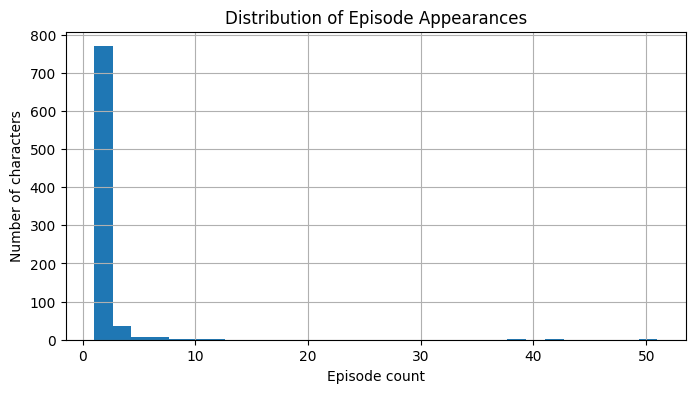

In [35]:
# If you have an episode_count column
episode_counts = df["episode_count"]

# Summary statistics
print(episode_counts.describe())

# Frequency distribution
episode_freq = episode_counts.value_counts().sort_index()
print(episode_freq.head(20))

# Histogram
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
episode_counts.hist(bins=30)
plt.xlabel("Episode count")
plt.ylabel("Number of characters")
plt.title("Distribution of Episode Appearances")
plt.show()


In [36]:
# Count unique origins per species
spread = df.groupby("species")["origin_dimension"].nunique().sort_values(ascending=False)
print(spread.head(20))




species
Human                    22
Alien                     6
Animal                    6
Humanoid                  6
Mythological Creature     5
unknown                   3
Robot                     2
Cronenberg                2
Disease                   1
Poopybutthole             1
Name: origin_dimension, dtype: int64


gender
Male          610
Female        148
unknown        49
Genderless     19
Name: count, dtype: int64
gender
Male          73.85
Female        17.92
unknown        5.93
Genderless     2.30
Name: proportion, dtype: float64


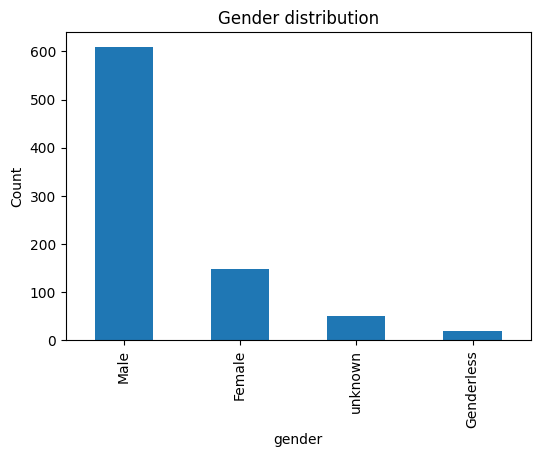

In [37]:
# Counts and percentages
gender_counts = df["gender"].value_counts(dropna=False)
gender_percent = df["gender"].value_counts(normalize=True, dropna=False) * 100

print(gender_counts)
print(gender_percent.round(2))

# Pie chart or bar chart
gender_counts.plot(kind="bar", figsize=(6,4))
plt.title("Gender distribution")
plt.ylabel("Count")
plt.show()


In [38]:
import pandas as pd

df = merged_data_rick_and_morty  # your dataset

results = {}

for col in df.columns:
    # Only analyse columns with string-like values
    if df[col].dtype == "object":
        counts = df[col].value_counts(dropna=False)

        highest_value = counts.idxmax()
        highest_count = counts.max()

        lowest_value = counts.idxmin()
        lowest_count = counts.min()

        results[col] = {
            "highest_value": highest_value,
            "highest_count": highest_count,
            "lowest_value": lowest_value,
            "lowest_count": lowest_count
        }

summary = pd.DataFrame(results).T
print(summary)


                                       highest_value highest_count  \
character_name      Cirque du Soleil Zumanity Member             5   
status                                         Alive           439   
species                                        Human           366   
type                                             NaN           401   
gender                                          Male           610   
origin_type                                   Planet           351   
origin_dimension               Replacement Dimension           307   
location_type                                 Planet           423   
location_dimension             Replacement Dimension           419   

                                   lowest_value lowest_count  
character_name                     Bearded Lady            1  
status                                  unknown          100  
species                                 Disease            6  
type                Human with ants in his eyes

No episodes list column detected. Running episode_count based analyses (distribution, top characters, fade proxy).

Episode count summary:
count    826.000000
mean       1.533898
std        3.557587
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max       51.000000
Name: episode_count, dtype: float64


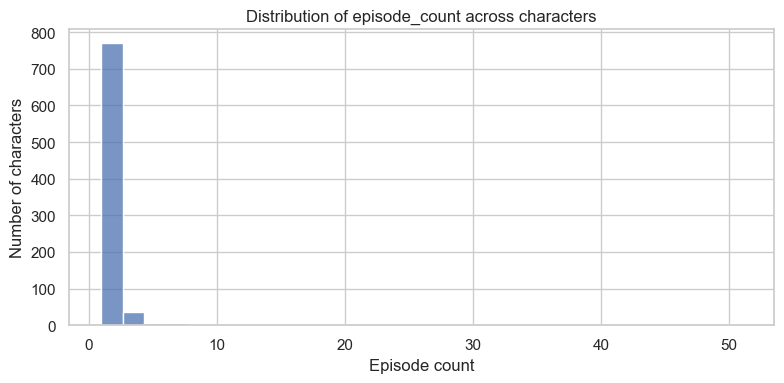


Top characters by episode_count:
                 character_name  episode_count
0                  Rick Sanchez             51
1                   Morty Smith             51
2                  Summer Smith             42
3                    Beth Smith             42
4                   Jerry Smith             39
179                     Jessica             12
239              Mr. Goldenfold             10
180            Jessica's Friend              8
328         Snuffles (Snowball)              8
243           Mr. Poopybutthole              7
46                   Birdperson              7
271            Principal Vagina              6
250                       Nancy              6
361                 Traflorkian              5
364                Tricia Lange              5
343            Tammy Guetermann              5
22                 Arcade Alien              5
241                Mr. Meeseeks              5
346            President Curtis              5
248                Mrs. Sa

C:\Users\Admin\AppData\Local\Temp\ipykernel_21700\806288515.py:251: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_chars_by_count.head(top_n), x=EP_COUNT_COL, y=CHAR_NAME_COL, palette="magma")


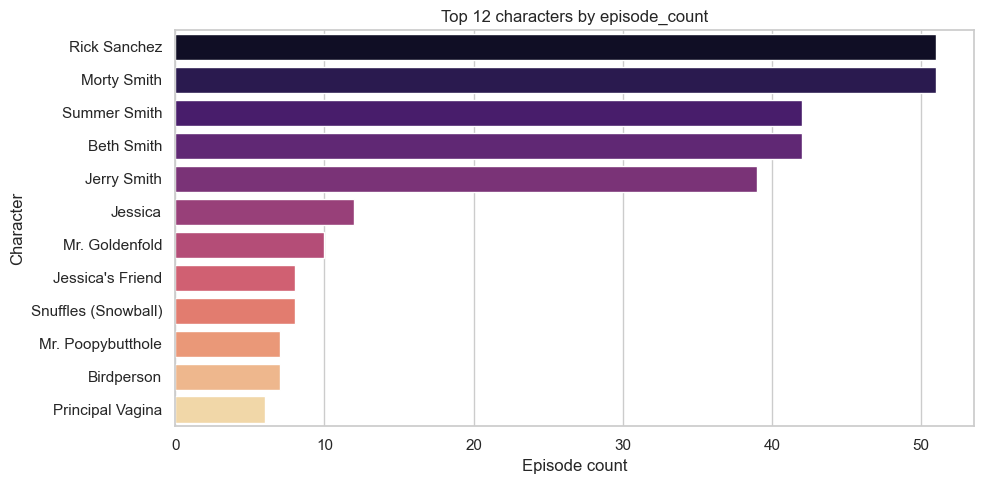


Summary (deduplicated by character_name):
     character_id              character_name  episode_count  \
0               1                Rick Sanchez             51   
1               2                 Morty Smith             51   
3               4                  Beth Smith             42   
2               3                Summer Smith             42   
4               5                 Jerry Smith             39   
328           329         Snuffles (Snowball)              8   
180           181            Jessica's Friend              8   
243           244           Mr. Poopybutthole              7   
46             47                  Birdperson              7   
250           251                       Nancy              6   
346           347            President Curtis              5   
22             23                Arcade Alien              5   
361           362                 Traflorkian              5   
364           365                Tricia Lange              5 

In [39]:
# Character popularity over time (works with or without an episodes list)
import re
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
pd.options.mode.chained_assignment = None

# ---------- CONFIG ----------
df = merged_data_rick_and_morty.copy()   # your DataFrame
CHAR_ID_COL = "character_id"
CHAR_NAME_COL = "character_name"
EP_COUNT_COL = "episode_count"

# Candidate names for a column that contains episode lists per character.
# If one of these exists, the script will run the full timeline analysis.
EPISODES_COL_CANDIDATES = ["episodes", "episode_list", "episode_ids", "episodes_list", "episode_urls"]
TOP_N = 12   # number of top characters to plot in timeline
# ----------------------------

# Find which episodes column (if any) exists in the DataFrame
EPISODES_COL = None
for c in EPISODES_COL_CANDIDATES:
    if c in df.columns:
        EPISODES_COL = c
        break

# Helper: extract numeric episode id from strings like ".../episode/28" or "S01E02" or "28"
def extract_episode_id(x):
    if pd.isna(x):
        return None
    if isinstance(x, (int, np.integer)):
        return int(x)
    if isinstance(x, str):
        # try numeric at end
        m = re.search(r'episode/(\d+)', x)
        if m:
            return int(m.group(1))
        m2 = re.search(r'(\d+)$', x.strip())
        if m2:
            return int(m2.group(1))
        # try SxxExx -> synthetic id season*100 + episode
        m3 = re.search(r'[sS](\d{1,2})[eE](\d{1,2})', x)
        if m3:
            s = int(m3.group(1)); e = int(m3.group(2))
            return s * 100 + e
    if isinstance(x, dict):
        for k in ("id", "episode", "episode_id"):
            if k in x and pd.notna(x[k]):
                return extract_episode_id(x[k])
        for k in ("code", "episode_code"):
            if k in x and pd.notna(x[k]):
                return extract_episode_id(x[k])
    return None

# Normalize a cell that may contain a list, stringified list, comma-separated, or URLs
def normalize_episodes_cell(cell):
    if pd.isna(cell):
        return []
    if isinstance(cell, (list, tuple, set)):
        items = list(cell)
    elif isinstance(cell, str):
        # try to parse JSON-like list
        try:
            parsed = ast.literal_eval(cell)
            if isinstance(parsed, (list, tuple)):
                items = list(parsed)
            else:
                items = [cell]
        except Exception:
            items = [s.strip() for s in cell.split(",") if s.strip() != ""]
    else:
        items = [cell]
    ids = []
    for it in items:
        eid = extract_episode_id(it)
        if eid is not None:
            ids.append(eid)
    ids = sorted(set(ids))
    return ids

# ----------------------------
# Branch A: Full timeline analysis if an episodes list column exists
# ----------------------------
if EPISODES_COL is not None:
    print(f"Detected episodes column: '{EPISODES_COL}'. Running full timeline analysis.\n")
    df["_episode_ids"] = df[EPISODES_COL].apply(normalize_episodes_cell)

    # Build character-level metrics
    metrics = []
    for _, row in df.iterrows():
        name = row.get(CHAR_NAME_COL, None)
        ep_ids = row["_episode_ids"] if isinstance(row["_episode_ids"], list) else []
        if len(ep_ids) == 0:
            first = None; last = None; total = 0
        else:
            first = min(ep_ids)
            last = max(ep_ids)
            total = len(ep_ids)
        metrics.append({
            "character_id": row.get(CHAR_ID_COL, None),
            "character_name": name,
            "first_episode": first,
            "last_episode": last,
            "total_appearances": total,
            "returns": max(0, total - 1)
        })

    metrics_df = pd.DataFrame(metrics).set_index("character_name")

    # Infer season from synthetic ids (season*100 + ep) when possible
    def id_to_season(eid):
        if eid is None:
            return np.nan
        if eid >= 100:
            return eid // 100
        return np.nan

    metrics_df["first_season"] = metrics_df["first_episode"].apply(id_to_season)
    metrics_df["last_season"] = metrics_df["last_episode"].apply(id_to_season)

    # Season introduction counts
    season_intro = metrics_df["first_season"].value_counts(dropna=True).sort_index()
    season_intro = season_intro.rename_axis("season").reset_index(name="new_characters").sort_values("season")

    # Fade-out detection: last_season <= max_season - 2
    if metrics_df["last_season"].dropna().any():
        max_season = int(metrics_df["last_season"].dropna().max())
        metrics_df["fade_flag"] = metrics_df["last_season"].apply(lambda s: True if (pd.notna(s) and (s <= max_season - 2)) else False)
    else:
        metrics_df["fade_flag"] = False

    # Top characters by total appearances
    top_chars = metrics_df.sort_values("total_appearances", ascending=False).head(TOP_N).index.tolist()

    # Build flat table (character, episode_id)
    rows = []
    for name, r in metrics_df.iterrows():
        for eid in r["total_appearances"] and df.loc[df[CHAR_NAME_COL] == name, "_episode_ids"].values[0] or []:
            rows.append({"character_name": name, "episode_id": eid, "season": id_to_season(eid)})
    flat = pd.DataFrame(rows)

    # If flat is empty, rebuild more robustly
    if flat.empty:
        rows = []
        for _, row in df.iterrows():
            name = row.get(CHAR_NAME_COL)
            for eid in row["_episode_ids"]:
                rows.append({"character_name": name, "episode_id": eid, "season": id_to_season(eid)})
        flat = pd.DataFrame(rows)

    if flat.empty:
        print("No episode rows after normalization. Check the format of your episodes column.")
    else:
        episode_order = sorted(flat["episode_id"].unique())
        cum_list = []
        for eid in episode_order:
            sub = flat[flat["episode_id"] <= eid]
            counts = sub.groupby("character_name").size().rename("appearances_up_to").reset_index()
            counts["episode_id"] = eid
            cum_list.append(counts)
        cum_df = pd.concat(cum_list, ignore_index=True)
        cum_top = cum_df[cum_df["character_name"].isin(top_chars)]

        # Plot 1: cumulative appearance timeline for top characters
        plt.figure(figsize=(12,6))
        for name in top_chars:
            s = cum_top[cum_top["character_name"] == name].sort_values("episode_id")
            plt.plot(s["episode_id"], s["appearances_up_to"], label=name)
        plt.xlabel("Episode (id or synthetic season*100+ep)")
        plt.ylabel("Cumulative appearances")
        plt.title(f"Cumulative appearances over episodes (top {TOP_N} characters)")
        plt.legend(loc="upper left", bbox_to_anchor=(1,1))
        plt.tight_layout()
        plt.show()

        # Plot 2: new characters introduced per season (bar)
        if not season_intro.empty:
            plt.figure(figsize=(8,4))
            sns.barplot(data=season_intro, x="season", y="new_characters", palette="viridis")
            plt.title("New characters introduced per season")
            plt.xlabel("Season")
            plt.ylabel("Number of new characters")
            plt.tight_layout()
            plt.show()

        # Plot 3: first vs last appearance scatter (fade-out view)
        scatter_df = metrics_df.reset_index().dropna(subset=["first_episode", "last_episode"])
        plt.figure(figsize=(8,6))
        sns.scatterplot(data=scatter_df, x="first_episode", y="last_episode", size="total_appearances", hue="fade_flag", palette={True:"red", False:"blue"}, alpha=0.7)
        plt.xlabel("First appearance (episode id)")
        plt.ylabel("Last appearance (episode id)")
        plt.title("First vs Last appearance (size = total appearances). Red = faded characters")
        plt.legend(title="Faded")
        plt.tight_layout()
        plt.show()

    # Summary tables
    summary_table = metrics_df[["total_appearances", "returns", "first_episode", "last_episode", "first_season", "last_season", "fade_flag"]].sort_values("total_appearances", ascending=False)
    print("\nTop characters by total appearances:")
    print(summary_table.head(20))

    print("\nNew characters introduced per season:")
    print(season_intro)

    print("\nCharacters flagged as faded (last_season <= max_season - 2):")
    print(metrics_df[metrics_df["fade_flag"]].sort_values("last_season").head(50))

# ----------------------------
# Branch B: No episodes list available — use episode_count and proxies
# ----------------------------
else:
    print("No episodes list column detected. Running episode_count based analyses (distribution, top characters, fade proxy).\n")

    # Ensure episode_count is numeric
    if EP_COUNT_COL not in df.columns:
        raise ValueError(f"Expected episode count column '{EP_COUNT_COL}' not found in DataFrame.")
    df[EP_COUNT_COL] = pd.to_numeric(df[EP_COUNT_COL], errors="coerce").fillna(0).astype(int)

    # Distribution of episode_count
    print("Episode count summary:")
    print(df[EP_COUNT_COL].describe())

    plt.figure(figsize=(8,4))
    sns.histplot(df[EP_COUNT_COL], bins=30, kde=False)
    plt.xlabel("Episode count")
    plt.ylabel("Number of characters")
    plt.title("Distribution of episode_count across characters")
    plt.tight_layout()
    plt.show()

    # Top characters by episode_count
    top_chars_by_count = df.sort_values(EP_COUNT_COL, ascending=False)[[CHAR_NAME_COL, EP_COUNT_COL]].drop_duplicates(CHAR_NAME_COL).head(30)
    print("\nTop characters by episode_count:")
    print(top_chars_by_count)

    # Define a fade proxy: characters with episode_count <= 1 (one-offs) or low counts
    one_offs = df[df[EP_COUNT_COL] <= 1][CHAR_NAME_COL].unique()
    low_threshold = max(1, int(df[EP_COUNT_COL].quantile(0.25)))  # bottom 25% as low
    low_appearers = df[df[EP_COUNT_COL] <= low_threshold][CHAR_NAME_COL].unique()

    print(f"\nNumber of one-off characters (episode_count <= 1): {len(one_offs)}")
    print(f"Low-appearance threshold (<= {low_threshold}) — number of characters: {len(low_appearers)}")

    # If you have season info elsewhere, you can map it later; for now we show top N cumulative by episode_count
    top_n = TOP_N
    plt.figure(figsize=(10,5))
    sns.barplot(data=top_chars_by_count.head(top_n), x=EP_COUNT_COL, y=CHAR_NAME_COL, palette="magma")
    plt.title(f"Top {top_n} characters by episode_count")
    plt.xlabel("Episode count")
    plt.ylabel("Character")
    plt.tight_layout()
    plt.show()

    # Summary table
    summary = df[[CHAR_ID_COL, CHAR_NAME_COL, EP_COUNT_COL, "species", "gender", "status"]].drop_duplicates(CHAR_NAME_COL).sort_values(EP_COUNT_COL, ascending=False)
    print("\nSummary (deduplicated by character_name):")
    print(summary.head(50))


No episodes-list column detected. Running episode_count-based species evolution proxies.

Species episode-count summary (median episodes):
                       characters  median_episodes  mean_episodes
species                                                          
Cronenberg                      8              2.0       2.375000
Alien                         205              1.0       1.239024
Animal                         55              1.0       1.218182
Disease                         6              1.0       1.000000
Human                         366              1.0       1.928962
Humanoid                       68              1.0       1.191176
Mythological Creature          46              1.0       1.108696
Poopybutthole                   8              1.0       2.000000
Robot                          51              1.0       1.019608
unknown                        13              1.0       1.153846

Species diversity by episode-count quartile (proxy for early vs late

C:\Users\Admin\AppData\Local\Temp\ipykernel_21700\3547112305.py:156: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  diversity_by_quartile = df.groupby("ep_quartile")[SPECIES_COL].nunique().rename("unique_species").reset_index()
C:\Users\Admin\AppData\Local\Temp\ipykernel_21700\3547112305.py:170: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_species, x=species_stats.loc[top_species,"median_episodes"], palette="coolwarm")


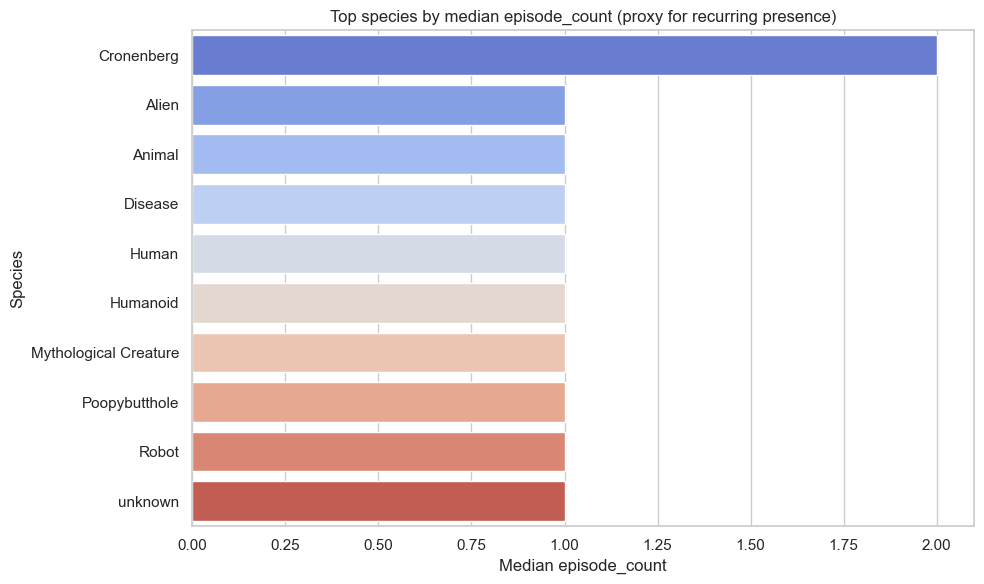

In [40]:
# Cell 1 — Species evolution across seasons
# - Uses your column names exactly
# - If you have a column that lists episodes per character (e.g., "episodes", "episode_list"),
#   the script will extract first/last episode and infer seasons (synthetic season*100+ep if SxxExx codes exist).
# - If you do NOT have an episodes list, the script falls back to using `episode_count` and produces
#   species-level summaries and diversity proxies.

import re
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
pd.options.mode.chained_assignment = None

# --- CONFIG: point this to your DataFrame ---
df = merged_data_rick_and_morty.copy()

# Column names you provided
CHAR_ID_COL = "character_id"
CHAR_NAME_COL = "character_name"
EP_COUNT_COL = "episode_count"
SPECIES_COL = "species"

# Candidate names for an episodes-list column (if present)
EPISODES_COL_CANDIDATES = ["episodes", "episode_list", "episode_ids", "episode_urls", "episodes_list"]

# Helper to extract numeric episode id or synthetic season*100+ep from strings like "S01E02" or ".../episode/28"
def extract_episode_id(x):
    if pd.isna(x):
        return None
    if isinstance(x, (int, np.integer)):
        return int(x)
    if isinstance(x, str):
        m = re.search(r'episode/(\d+)', x)
        if m:
            return int(m.group(1))
        m2 = re.search(r'(\d+)$', x.strip())
        if m2:
            return int(m2.group(1))
        m3 = re.search(r'[sS](\d{1,2})[eE](\d{1,2})', x)
        if m3:
            s = int(m3.group(1)); e = int(m3.group(2))
            return s * 100 + e
    if isinstance(x, dict):
        for k in ("id", "episode", "episode_id", "code"):
            if k in x and pd.notna(x[k]):
                return extract_episode_id(x[k])
    return None

def normalize_episodes_cell(cell):
    if pd.isna(cell):
        return []
    if isinstance(cell, (list, tuple, set)):
        items = list(cell)
    elif isinstance(cell, str):
        try:
            parsed = ast.literal_eval(cell)
            if isinstance(parsed, (list, tuple)):
                items = list(parsed)
            else:
                items = [cell]
        except Exception:
            items = [s.strip() for s in cell.split(",") if s.strip() != ""]
    else:
        items = [cell]
    ids = []
    for it in items:
        eid = extract_episode_id(it)
        if eid is not None:
            ids.append(eid)
    return sorted(set(ids))

# detect episodes column if present
EPISODES_COL = next((c for c in EPISODES_COL_CANDIDATES if c in df.columns), None)

if EPISODES_COL is not None:
    # Normalize episodes into numeric ids
    df["_episode_ids"] = df[EPISODES_COL].apply(normalize_episodes_cell)

    # Build first/last appearance per character
    char_rows = []
    for _, r in df.iterrows():
        name = r[CHAR_NAME_COL]
        ep_ids = r["_episode_ids"] if isinstance(r["_episode_ids"], list) else []
        first = min(ep_ids) if ep_ids else np.nan
        last = max(ep_ids) if ep_ids else np.nan
        char_rows.append({"character_name": name, "first_episode": first, "last_episode": last, "total_appearances": len(ep_ids), SPECIES_COL: r.get(SPECIES_COL, np.nan)})
    char_df = pd.DataFrame(char_rows).drop_duplicates("character_name").set_index("character_name")

    # Infer season from synthetic ids (season*100 + ep) when possible
    def id_to_season(eid):
        if pd.isna(eid):
            return np.nan
        if eid >= 100:
            return int(eid // 100)
        return np.nan

    char_df["first_season"] = char_df["first_episode"].apply(id_to_season)
    char_df["last_season"] = char_df["last_episode"].apply(id_to_season)

    # 1) Which species appear early vs late: compute median first_season per species
    species_first = char_df.reset_index().groupby(SPECIES_COL)["first_season"].median().dropna().sort_values()
    print("Median first season per species (earliest -> latest):")
    print(species_first.head(30))

    # 2) Species diversity per season: count unique species whose first appearance is in each season
    season_species = char_df.reset_index().dropna(subset=["first_season"]).groupby("first_season")[SPECIES_COL].nunique().rename("unique_species").reset_index().sort_values("first_season")
    print("\nUnique species introduced per season:")
    print(season_species)

    # Plot species diversity per season (bar)
    plt.figure(figsize=(8,4))
    sns.barplot(data=season_species, x="first_season", y="unique_species", palette="viridis")
    plt.xlabel("Season")
    plt.ylabel("Unique species introduced")
    plt.title("Species diversity introduced per season")
    plt.tight_layout()
    plt.show()

    # 3) Species that appear only once vs recurring: count characters per species with total_appearances == 1
    species_counts = char_df.reset_index().groupby(SPECIES_COL)["total_appearances"].agg(["count", lambda s: (s==1).sum()]).rename(columns={"count":"characters","<lambda_0>":"one_off_characters"})
    species_counts["one_off_pct"] = (species_counts["one_off_characters"] / species_counts["characters"] * 100).round(2)
    species_counts = species_counts.sort_values("one_off_pct", ascending=False)
    print("\nSpecies one-off vs recurring summary (highest one-off % first):")
    print(species_counts.head(30))

    # Heatmap: species vs season (count of characters introduced)
    pivot = char_df.reset_index().dropna(subset=["first_season"]).pivot_table(index=SPECIES_COL, columns="first_season", values="total_appearances", aggfunc="count", fill_value=0)
    # keep top species by total characters for readability
    top_species = pivot.sum(axis=1).sort_values(ascending=False).head(25).index
    plt.figure(figsize=(12,8))
    sns.heatmap(pivot.loc[top_species], cmap="magma", linewidths=.5, linecolor="gray")
    plt.title("Heatmap: number of characters (by species) introduced per season (top species)")
    plt.xlabel("Season")
    plt.ylabel("Species")
    plt.tight_layout()
    plt.show()

else:
    # Fallback: no episodes list — use episode_count as a proxy
    print("No episodes-list column detected. Running episode_count-based species evolution proxies.\n")
    if EP_COUNT_COL not in df.columns:
        raise ValueError(f"Expected episode count column '{EP_COUNT_COL}' not found.")
    df[EP_COUNT_COL] = pd.to_numeric(df[EP_COUNT_COL], errors="coerce").fillna(0).astype(int)

    # 1) Which species tend to have higher episode counts (proxy for recurring / late-appearing)
    species_stats = df.groupby(SPECIES_COL)[EP_COUNT_COL].agg(["count","median","mean"]).rename(columns={"count":"characters","median":"median_episodes","mean":"mean_episodes"}).sort_values("median_episodes", ascending=False)
    print("Species episode-count summary (median episodes):")
    print(species_stats.head(30))

    # 2) Species diversity per dataset slice: for example, split characters by episode_count quartiles and measure species diversity
    df["ep_quartile"] = pd.qcut(df[EP_COUNT_COL].rank(method="first"), 4, labels=["Q1","Q2","Q3","Q4"])
    diversity_by_quartile = df.groupby("ep_quartile")[SPECIES_COL].nunique().rename("unique_species").reset_index()
    print("\nSpecies diversity by episode-count quartile (proxy for early vs late):")
    print(diversity_by_quartile)

    # 3) Species one-off vs recurring using episode_count == 1
    species_counts = df.groupby(SPECIES_COL)[EP_COUNT_COL].agg(["count", lambda s: (s==1).sum()]).rename(columns={"count":"characters","<lambda_0>":"one_off_characters"})
    species_counts["one_off_pct"] = (species_counts["one_off_characters"] / species_counts["characters"] * 100).round(2)
    species_counts = species_counts.sort_values("one_off_pct", ascending=False)
    print("\nSpecies one-off vs recurring summary (episode_count proxy):")
    print(species_counts.head(30))

    # Plot: species median episode_count (top species)
    top_species = species_stats.head(20).index
    plt.figure(figsize=(10,6))
    sns.barplot(y=top_species, x=species_stats.loc[top_species,"median_episodes"], palette="coolwarm")
    plt.xlabel("Median episode_count")
    plt.ylabel("Species")
    plt.title("Top species by median episode_count (proxy for recurring presence)")
    plt.tight_layout()
    plt.show()


Most common origin_id (characters' home planets):
    origin_id  character_count
0        20.0              146
1         1.0               23
2        96.0               23
3         6.0               16
4        78.0               13
5       110.0               12
6         8.0               10
7        82.0                8
8        13.0                7
9         3.0                7
10       98.0                7
11      101.0                6
12       23.0                6
13        5.0                6
14       40.0                6
15      104.0                6
16       94.0                6
17       32.0                5
18       28.0                5
19       47.0                5

Most common current location_id (where characters are found):
    location_id  character_count
0          20.0              217
1           3.0               98
2           6.0               61
3          96.0               21
4           1.0               18
5          78.0               14
6    

C:\Users\Admin\AppData\Local\Temp\ipykernel_21700\3569920883.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=origin_counts.head(15), x="character_count", y="origin_id", palette="viridis")


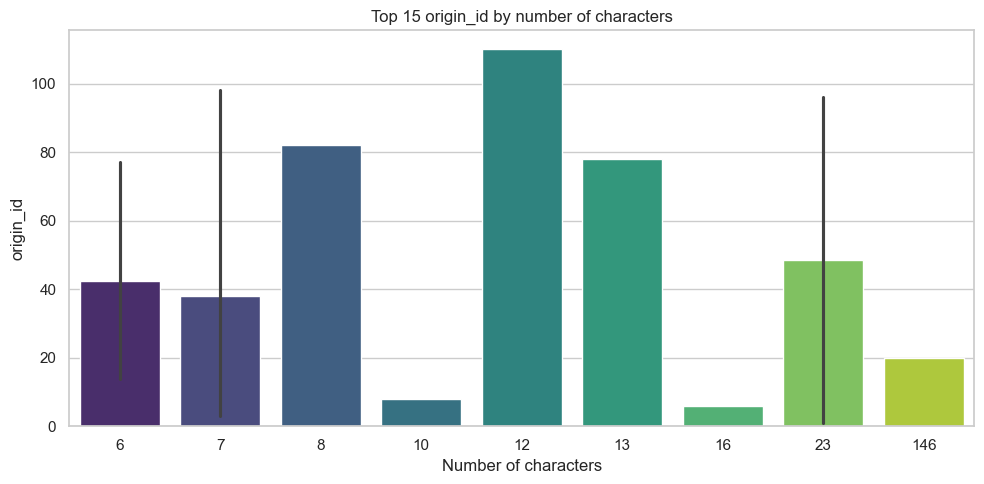

C:\Users\Admin\AppData\Local\Temp\ipykernel_21700\3569920883.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=origin_species.head(15), x="unique_species", y="origin_id", palette="magma")


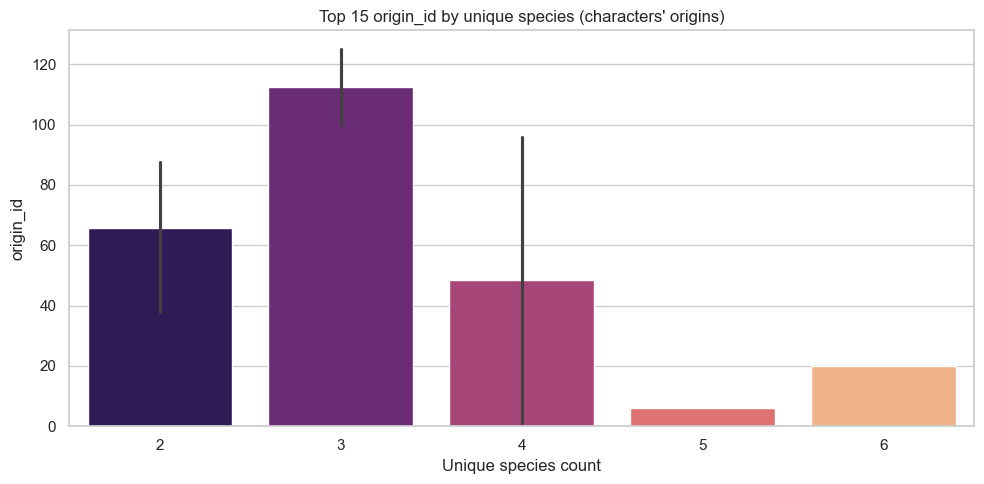


Sample map dataframe (first rows):
    origin_id  unique_species  character_count            origin_dimension
0        20.0               6              146       Replacement Dimension
1         6.0               5               16                     unknown
2         1.0               4               23             Dimension C-137
3        96.0               4               23       Replacement Dimension
4       100.0               3                4       Replacement Dimension
5       125.0               3                3       Replacement Dimension
6         8.0               2               10  Post-Apocalyptic Dimension
7        94.0               2                6             Magic Dimension
8        98.0               2                7       Replacement Dimension
9        78.0               2               13       Replacement Dimension
10       85.0               2                2       Replacement Dimension
11       40.0               2                6                  

In [41]:
# Cell 2 — Location analysis (origin + location)
# - Uses your exact column names: origin_id, origin_type, origin_dimension, location_id, location_type, location_dimension
# - Produces: most visited planets (by character origin and by current location),
#   planets with most unique species, and characters who travel the most (origin != location).
# - If you have multiple rows per character, deduplicate by character_name first.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
pd.options.mode.chained_assignment = None

df = merged_data_rick_and_morty.copy()

# Column names
CHAR_NAME_COL = "character_name"
ORIGIN_ID = "origin_id"
ORIGIN_TYPE = "origin_type"
ORIGIN_DIM = "origin_dimension"
LOCATION_ID = "location_id"
LOCATION_TYPE = "location_type"
LOCATION_DIM = "location_dimension"
SPECIES_COL = "species"

# Deduplicate characters (keep first or the row with highest episode_count if available)
if "episode_count" in df.columns:
    df = df.sort_values("episode_count", ascending=False).drop_duplicates(CHAR_NAME_COL)
else:
    df = df.drop_duplicates(CHAR_NAME_COL)

# 1) Most visited planets by origin_id (where characters come from)
origin_counts = df[ORIGIN_ID].value_counts(dropna=True).rename_axis("origin_id").reset_index(name="character_count")
print("Most common origin_id (characters' home planets):")
print(origin_counts.head(20))

# 2) Most common current locations (location_id)
location_counts = df[LOCATION_ID].value_counts(dropna=True).rename_axis("location_id").reset_index(name="character_count")
print("\nMost common current location_id (where characters are found):")
print(location_counts.head(20))

# 3) Planets with the most unique species (by origin)
origin_species = df.groupby(ORIGIN_ID)[SPECIES_COL].nunique().rename("unique_species").reset_index().sort_values("unique_species", ascending=False)
print("\nPlanets (origin_id) with most unique species:")
print(origin_species.head(20))

# 4) Characters who travel the most: origin_id != location_id
df["travels"] = df.apply(lambda r: (pd.notna(r[ORIGIN_ID]) and pd.notna(r[LOCATION_ID]) and r[ORIGIN_ID] != r[LOCATION_ID]), axis=1)
travelers = df[df["travels"]][[CHAR_NAME_COL, ORIGIN_ID, LOCATION_ID, SPECIES_COL]]
print(f"\nNumber of characters with origin != location (travelers): {len(travelers)}")
print(travelers.head(30))

# 5) Simple "universe map" data: counts by origin_dimension or location_dimension (if available)
if ORIGIN_DIM in df.columns:
    origin_dim_counts = df[ORIGIN_DIM].value_counts(dropna=True).rename_axis("origin_dimension").reset_index(name="character_count")
    print("\nCharacters by origin_dimension (top):")
    print(origin_dim_counts.head(20))

if LOCATION_DIM in df.columns:
    location_dim_counts = df[LOCATION_DIM].value_counts(dropna=True).rename_axis("location_dimension").reset_index(name="character_count")
    print("\nCharacters by location_dimension (top):")
    print(location_dim_counts.head(20))

# Visualisations
plt.figure(figsize=(10,5))
sns.barplot(data=origin_counts.head(15), x="character_count", y="origin_id", palette="viridis")
plt.title("Top 15 origin_id by number of characters")
plt.xlabel("Number of characters")
plt.ylabel("origin_id")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(data=origin_species.head(15), x="unique_species", y="origin_id", palette="magma")
plt.title("Top 15 origin_id by unique species (characters' origins)")
plt.xlabel("Unique species count")
plt.ylabel("origin_id")
plt.tight_layout()
plt.show()

# If you want to create a simple CSV for a "map" (origin_id, origin_dimension, unique_species, character_count)
map_df = origin_species.merge(origin_counts, on="origin_id", how="left")
if ORIGIN_DIM in df.columns:
    dims = df[[ORIGIN_ID, ORIGIN_DIM]].drop_duplicates(ORIGIN_ID).rename(columns={ORIGIN_ID:"origin_id", ORIGIN_DIM:"origin_dimension"})
    map_df = map_df.merge(dims, on="origin_id", how="left")
print("\nSample map dataframe (first rows):")
print(map_df.head(20))


Survival / death rates by species (top rows):
status                 Alive  Dead  unknown  total  death_rate_pct
species                                                           
Disease                    0     6        0      6          100.00
Robot                      7    34        9     50           68.00
Humanoid                  30    27        7     64           42.19
Alien                     99    74       15    188           39.36
Human                    192    96       43    331           29.00
Animal                    35    14        4     53           26.42
Mythological Creature     24    10        7     41           24.39
unknown                    9     2        2     13           15.38
Cronenberg                 1     0        2      3            0.00
Poopybutthole              8     0        0      8            0.00


C:\Users\Admin\AppData\Local\Temp\ipykernel_21700\3564151955.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="death_rate_pct", y=species_filtered.index, data=species_filtered.reset_index(), palette="rocket")


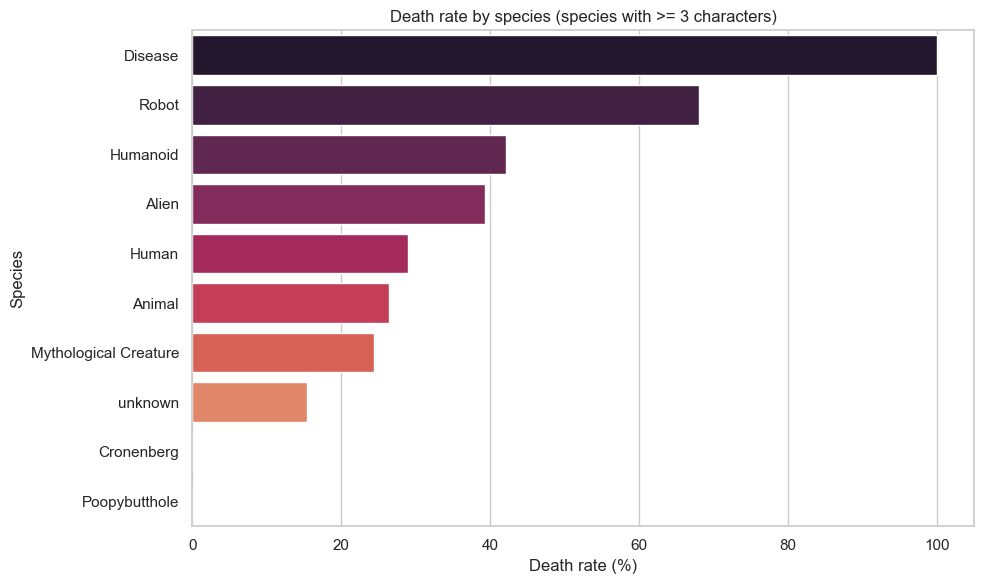


Survival / death rates by gender:
status      Alive  Dead  unknown  total  death_rate_pct
gender                                                 
Female         83    39        8    130           30.00
Genderless     10     5        4     19           26.32
Male          287   202       71    560           36.07
unknown        25    17        6     48           35.42


C:\Users\Admin\AppData\Local\Temp\ipykernel_21700\3564151955.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_status.index, y=gender_status["death_rate_pct"].values, palette="pastel")


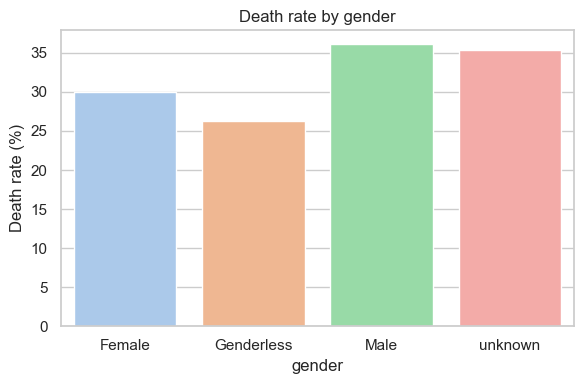


Top origins by death rate (origins with at least 3 characters):
status     Alive  Dead  unknown  total  death_rate_pct
origin_id                                             
5.0            0     6        0      6          100.00
98.0           0     7        0      7          100.00
110.0          2    10        0     12           83.33
101.0          0     5        1      6           83.33
120.0          1     4        0      5           80.00
9.0            1     3        0      4           75.00
77.0           1     3        0      4           75.00
37.0           0     3        2      5           60.00
13.0           0     4        3      7           57.14
8.0            5     5        0     10           50.00
103.0          2     2        0      4           50.00
3.0            2     3        2      7           42.86
20.0          84    53        9    146           36.30
57.0           1     1        1      3           33.33
109.0          2     1        0      3           33.33


In [42]:
# Cell 3 — Character survival analysis
# - Uses your 'status', 'species', 'gender', 'origin_id' columns
# - Computes survival rates by species, gender, and origin, and episodes with highest death counts if episode lists exist.
# - If you have an episodes list column (see candidates), the code will try to count deaths per episode by checking a 'death_episode' column
#   or by requiring an external events table. If not available, it will focus on status-based summaries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
pd.options.mode.chained_assignment = None

df = merged_data_rick_and_morty.copy()

# Column names
STATUS_COL = "status"            # expected values: "Alive", "Dead", "unknown", etc.
SPECIES_COL = "species"
GENDER_COL = "gender"
ORIGIN_ID = "origin_id"
CHAR_NAME_COL = "character_name"
EPISODES_COL_CANDIDATES = ["episodes", "episode_list", "episode_ids", "episode_urls"]

# Normalize status (simple cleaning)
df[STATUS_COL] = df[STATUS_COL].astype(str).str.strip().replace({"": "unknown", "None":"unknown", "Unknown":"unknown"})

# Deduplicate by character_name (keep row with highest episode_count if present)
if "episode_count" in df.columns:
    df = df.sort_values("episode_count", ascending=False).drop_duplicates(CHAR_NAME_COL)
else:
    df = df.drop_duplicates(CHAR_NAME_COL)

# 1) Survival rates by species
species_status = df.groupby(SPECIES_COL)[STATUS_COL].value_counts().unstack(fill_value=0)
species_status["total"] = species_status.sum(axis=1)
if "Dead" in species_status.columns:
    species_status["death_rate_pct"] = (species_status["Dead"] / species_status["total"] * 100).round(2)
else:
    species_status["death_rate_pct"] = 0.0
species_status = species_status.sort_values("death_rate_pct", ascending=False)
print("Survival / death rates by species (top rows):")
print(species_status.head(30))

# Plot top species by death rate (only species with at least N characters to avoid noise)
min_chars = 3
species_filtered = species_status[species_status["total"] >= min_chars].head(20)
plt.figure(figsize=(10,6))
sns.barplot(x="death_rate_pct", y=species_filtered.index, data=species_filtered.reset_index(), palette="rocket")
plt.xlabel("Death rate (%)")
plt.ylabel("Species")
plt.title(f"Death rate by species (species with >= {min_chars} characters)")
plt.tight_layout()
plt.show()

# 2) Survival rates by gender
gender_status = df.groupby(GENDER_COL)[STATUS_COL].value_counts().unstack(fill_value=0)
gender_status["total"] = gender_status.sum(axis=1)
if "Dead" in gender_status.columns:
    gender_status["death_rate_pct"] = (gender_status["Dead"] / gender_status["total"] * 100).round(2)
else:
    gender_status["death_rate_pct"] = 0.0
print("\nSurvival / death rates by gender:")
print(gender_status)

plt.figure(figsize=(6,4))
if "Dead" in gender_status.columns:
    sns.barplot(x=gender_status.index, y=gender_status["death_rate_pct"].values, palette="pastel")
    plt.ylabel("Death rate (%)")
    plt.title("Death rate by gender")
    plt.tight_layout()
    plt.show()

# 3) Survival rates by origin_id
origin_status = df.groupby(ORIGIN_ID)[STATUS_COL].value_counts().unstack(fill_value=0)
origin_status["total"] = origin_status.sum(axis=1)
if "Dead" in origin_status.columns:
    origin_status["death_rate_pct"] = (origin_status["Dead"] / origin_status["total"] * 100).round(2)
else:
    origin_status["death_rate_pct"] = 0.0
origin_status = origin_status.sort_values("death_rate_pct", ascending=False)
print("\nTop origins by death rate (origins with at least 3 characters):")
print(origin_status[origin_status["total"] >= 3].head(30))

# 4) Episodes with highest character death count (only possible if you have an episodes list and a way to know which episode a character died in)
EPISODES_COL = next((c for c in EPISODES_COL_CANDIDATES if c in df.columns), None)
if EPISODES_COL is not None and "Dead" in df[STATUS_COL].unique():
    # This is a heuristic: if you have a column like 'death_episode' or if the episodes list contains an event marker,
    # you can map deaths to episodes. Many datasets do not include death episode; if you do, replace 'death_episode' below.
    if "death_episode" in df.columns:
        death_by_episode = df.dropna(subset=["death_episode"]).groupby("death_episode")[CHAR_NAME_COL].count().rename("deaths").reset_index().sort_values("deaths", ascending=False)
        print("\nEpisodes with highest death counts (from 'death_episode' column):")
        print(death_by_episode.head(30))
    else:
        print("\nNo explicit 'death_episode' column found. If you have death episode info, add it as 'death_episode' and re-run.")
else:
    print("\nNo episodes-list or death-episode info available to compute deaths per episode. Status-based summaries provided above.")


In [43]:
# Cell 1 — CLI Quiz Generator
# - Uses your column names exactly: character_name, species, origin_id, episode_count, location_id
# - Generates multiple question types and runs a simple command-line quiz
# - Save this as quiz_cli.py and run with: python quiz_cli.py

import random
import pandas as pd

# Load your DataFrame (replace with your actual DataFrame variable or CSV path)
df = merged_data_rick_and_morty.copy()

# Column names
NAME = "character_name"
SPECIES = "species"
ORIGIN = "origin_id"
EP_COUNT = "episode_count"
LOCATION = "location_id"

# Prepare a deduplicated character table (one row per character)
if EP_COUNT in df.columns:
    df_chars = df.sort_values(EP_COUNT, ascending=False).drop_duplicates(NAME)
else:
    df_chars = df.drop_duplicates(NAME)

# Helper: sample distractors for a value from a column
def sample_distractors(col, correct, n=3):
    pool = df_chars[col].dropna().unique().tolist()
    pool = [p for p in pool if p != correct]
    return random.sample(pool, min(n, len(pool)))

# Question type 1: Which species is this character?
def q_species():
    row = df_chars.sample(1).iloc[0]
    correct = row[SPECIES]
    choices = [correct] + sample_distractors(SPECIES, correct, 3)
    random.shuffle(choices)
    question = f"What is the species of {row[NAME]}?"
    return question, choices, correct

# Question type 2: Where is this character from?
def q_origin():
    row = df_chars.sample(1).iloc[0]
    correct = row[ORIGIN]
    choices = [correct] + sample_distractors(ORIGIN, correct, 3)
    random.shuffle(choices)
    question = f"What is the origin_id of {row[NAME]}?"
    return question, choices, correct

# Question type 3: Who appears in more episodes?
def q_more_episodes():
    a, b = df_chars.sample(2).iloc[0], df_chars.sample(2).iloc[1]
    # ensure two different characters
    while a[NAME] == b[NAME]:
        b = df_chars.sample(1).iloc[0]
    correct = a[NAME] if a[EP_COUNT] >= b[EP_COUNT] else b[NAME]
    choices = [a[NAME], b[NAME]]
    question = f"Who appears in more episodes? A: {a[NAME]} ({a[EP_COUNT]}) or B: {b[NAME]} ({b[EP_COUNT]})"
    return question, choices, correct

# Question type 4: Which character has this episode count?
def q_episode_count():
    row = df_chars[df_chars[EP_COUNT] > 0].sample(1).iloc[0]
    correct = row[NAME]
    # pick distractors with similar episode_count if possible
    pool = df_chars.sort_values(EP_COUNT, ascending=False)
    distractors = pool[pool[NAME] != correct][NAME].sample(min(3, len(pool)-1)).tolist()
    choices = [correct] + distractors
    random.shuffle(choices)
    question = f"Which character appears in {row[EP_COUNT]} episodes?"
    return question, choices, correct

# Quiz runner
QUESTION_FUNCS = [q_species, q_origin, q_more_episodes, q_episode_count]

def run_quiz(n_questions=10):
    score = 0
    for i in range(n_questions):
        qfunc = random.choice(QUESTION_FUNCS)
        question, choices, correct = qfunc()
        print(f"\nQ{i+1}: {question}")
        for idx, c in enumerate(choices, 1):
            print(f"  {idx}. {c}")
        # get user input
        ans = input("Your answer (number): ").strip()
        try:
            ans_idx = int(ans) - 1
            picked = choices[ans_idx]
        except Exception:
            picked = None
        if picked == correct:
            print("Correct!")
            score += 1
        else:
            print(f"Wrong. Correct answer: {correct}")
    print(f"\nQuiz finished. Score: {score}/{n_questions}")

if __name__ == "__main__":
    run_quiz(10)



Q1: What is the species of Space Cruiser?
  1. Mythological Creature
  2. Alien
  3. Robot
  4. Disease
Correct!

Q2: Which character appears in 3 episodes?
  1. Scarecrow Jerry
  2. Amazing Johnathan
  3. Heroine Keith
  4. Tophat Jones
Correct!

Q3: Which character appears in 1 episodes?
  1. Troy
  2. Gramuflackian Anchorman
  3. High Pilot
  4. Mary-Lou
Wrong. Correct answer: High Pilot

Q4: What is the origin_id of Campaign Manager Morty?
  1. 48.0
  2. 30.0
  3. nan
  4. 61.0
Wrong. Correct answer: nan

Q5: What is the origin_id of Mr. Needful?
  1. 116.0
  2. nan
  3. 33.0
  4. 96.0
Wrong. Correct answer: nan

Q6: What is the species of Riq IV?
  1. Mythological Creature
  2. Animal
  3. Disease
  4. Human
Wrong. Correct answer: Human

Q7: What is the origin_id of Pink Polo Shirt Jerry?
  1. 47.0
  2. 112.0
  3. 37.0
  4. nan
Wrong. Correct answer: nan

Q8: What is the origin_id of Snake Lincoln?
  1. 13.0
  2. 57.0
  3. 24.0
  4. 78.0
Wrong. Correct answer: 78.0

Q9: What is t